<a href="https://colab.research.google.com/github/AKVITA380/Deep-Learning-6-July-2024/blob/main/Regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with keras
  

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')


#Step 1 Read the **Dataset**


In [3]:
import pandas as pd
url="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df=pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


**Step 2 Perform Basic Data Quality Check**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
df.duplicated().sum()

41

In [7]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [9]:
df=df.drop_duplicates(keep='first')
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


Seperate X and Y (PE)

In [10]:
X=df.drop(columns=['PE'])

In [11]:
Y=df[['PE']]

In [12]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [13]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


Step 4: Preprocess X using pipeline

In [14]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [17]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scale', StandardScaler())]).set_output(transform='pandas')

In [18]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


Apply Train Test split

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [20]:
xtrain.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [21]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [22]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [23]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [24]:
xtrain.shape

(7621, 4)

In [25]:
xtest.shape

(1906, 4)

In [26]:
xtrain.shape[1]

4

Step 5: Build the neural network
Hidden Layer use relu as activation function

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [29]:
# Intialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Dense Hidden Layer 1
model.add(Dense(16, activation='relu'))

# Add Hidden layer 2
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(1, activation='linear'))

In [30]:
# Compile the model
model.compile(loss="mse", metrics=["mae"], optimizer="adam")

In [31]:
hist = model.fit(xtrain, ytrain,validation_data=(xtest, ytest),epochs=60)

Epoch 1/60
239/239 [==============================] - 4s 4ms/step - loss: 202690.3281 - mae: 449.9412 - val_loss: 194230.5000 - val_mae: 440.5584
Epoch 2/60
239/239 [==============================] - 1s 4ms/step - loss: 169612.2656 - mae: 410.8521 - val_loss: 135210.2656 - val_mae: 366.0688
Epoch 3/60
239/239 [==============================] - 1s 4ms/step - loss: 94407.9766 - mae: 296.6133 - val_loss: 57276.0703 - val_mae: 221.0405
Epoch 4/60
239/239 [==============================] - 1s 4ms/step - loss: 37476.0195 - mae: 170.8118 - val_loss: 23415.0957 - val_mae: 131.7060
Epoch 5/60
239/239 [==============================] - 1s 4ms/step - loss: 17837.8223 - mae: 114.0351 - val_loss: 13290.0225 - val_mae: 98.1458
Epoch 6/60
239/239 [==============================] - 1s 6ms/step - loss: 11296.8633 - mae: 90.2747 - val_loss: 8821.9150 - val_mae: 79.1126
Epoch 7/60
239/239 [==============================] - 1s 6ms/step - loss: 7543.5083 - mae: 72.7249 - val_loss: 5755.1279 - val_mae: 62.9

In [32]:
hist.history["loss"]

[202690.328125,
 169612.265625,
 94407.9765625,
 37476.01953125,
 17837.822265625,
 11296.86328125,
 7543.50830078125,
 4916.72998046875,
 3152.572509765625,
 2039.6737060546875,
 1381.71630859375,
 972.4615478515625,
 701.4728393554688,
 514.1851196289062,
 384.4171447753906,
 291.37969970703125,
 223.95635986328125,
 174.94210815429688,
 139.3818359375,
 113.46168518066406,
 93.89070129394531,
 79.0778579711914,
 68.10382843017578,
 59.05890655517578,
 51.89431381225586,
 45.94887924194336,
 40.809303283691406,
 36.757408142089844,
 33.42067337036133,
 30.77851676940918,
 28.70888900756836,
 27.042694091796875,
 25.591758728027344,
 24.61777114868164,
 23.765729904174805,
 23.100122451782227,
 22.679462432861328,
 22.356964111328125,
 22.15024185180664,
 21.94240951538086,
 21.73602867126465,
 21.225940704345703,
 21.13510513305664,
 20.46959686279297,
 20.339649200439453,
 20.04001808166504,
 20.07009506225586,
 20.070384979248047,
 19.8496036529541,
 19.954082489013672,
 19.8887653

In [33]:
hist.history['val_loss']

[194230.5,
 135210.265625,
 57276.0703125,
 23415.095703125,
 13290.0224609375,
 8821.9150390625,
 5755.1279296875,
 3665.043701171875,
 2317.361083984375,
 1518.353271484375,
 1038.619873046875,
 741.4976806640625,
 529.833251953125,
 391.4681091308594,
 294.3919677734375,
 226.9614715576172,
 176.606201171875,
 141.54884338378906,
 114.25391387939453,
 95.1397933959961,
 80.30734252929688,
 69.22391510009766,
 59.42195510864258,
 52.421043395996094,
 46.3218994140625,
 41.24534606933594,
 36.96941375732422,
 33.67791748046875,
 30.930025100708008,
 28.46551513671875,
 26.73691177368164,
 25.4829044342041,
 24.377363204956055,
 23.62535858154297,
 22.857372283935547,
 22.67618751525879,
 22.79965591430664,
 21.871179580688477,
 21.874143600463867,
 21.42414665222168,
 21.508663177490234,
 21.065195083618164,
 20.91388511657715,
 21.169218063354492,
 19.852006912231445,
 20.07847023010254,
 19.919658660888672,
 20.315433502197266,
 19.8004150390625,
 20.505390167236328,
 19.80204010009

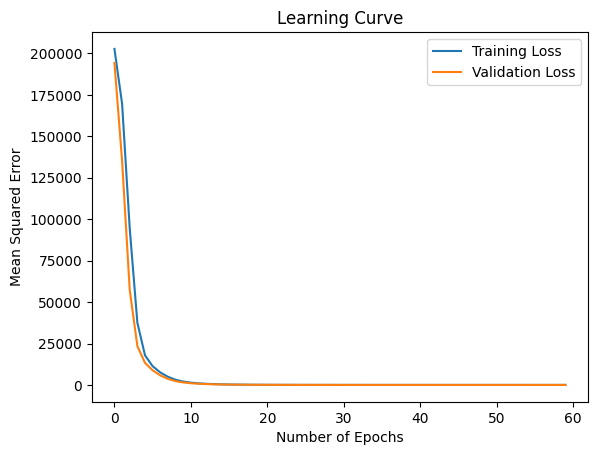

In [34]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [35]:
model.evaluate(xtrain, ytrain)

239/239 [==============================] - 1s 3ms/step - loss: 19.4364 - mae: 3.4540


[19.4364013671875, 3.454024314880371]

In [36]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 2ms/step - loss: 19.5896 - mae: 3.4941


[19.58956527709961, 3.4941346645355225]

Predict the results for train and test

In [37]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 1ms/step


In [38]:
ypred_train[0:5]

array([[450.60953],
       [477.89505],
       [468.059  ],
       [432.23502],
       [466.40994]], dtype=float32)

In [39]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [40]:
ypred_test[0:5]

array([[431.3383 ],
       [481.1763 ],
       [483.01697],
       [449.7324 ],
       [446.04794]], dtype=float32)

In [41]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [42]:
# R2 score in train
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)

0.9323775075698256

In [43]:
# R2 score in test
r2_score(ytest, ypred_test)

0.9350886844928625

Because I have r2 score > 0.8 for both train and test i can use above model for out of sample prediction

In [44]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [45]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [46]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [47]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 4ms/step


array([[444.4269 ],
       [438.7484 ],
       [430.91934],
       [439.1675 ],
       [474.506  ]], dtype=float32)

In [48]:
xnew["PowerOutput_pred"] = preds

In [49]:
xnew

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,444.426910
1,28.88,54.89,1007.16,46.60,438.748413
2,27.89,73.21,1001.32,85.88,430.919342
3,25.69,62.26,1011.38,74.08,439.167511
4,12.16,40.81,1025.79,70.97,474.506012
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,435.884766
96,11.78,39.96,1011.37,82.95,471.424591
97,5.62,41.38,1020.91,86.21,483.966583
98,24.96,74.99,1008.25,80.52,435.384003


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

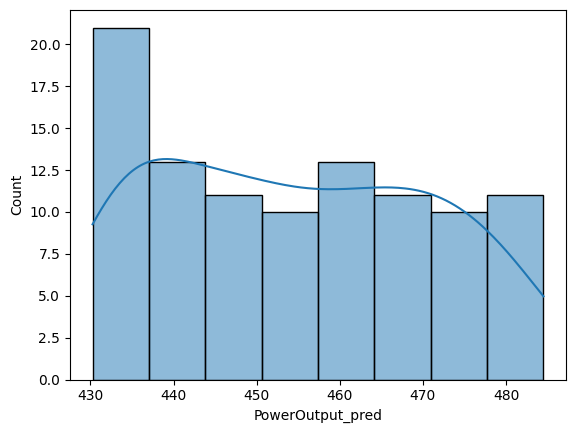

In [50]:
import seaborn as sns
sns.histplot(data=xnew, x="PowerOutput_pred", kde=True)

In [51]:
xnew.to_csv("Results.csv", index=False)